# 배우는 이유
프랑크 로젠블라트가 1957년에 고안한 알고리즘인 퍼셉트론은 신경망의 기원이 되는 알고리즘이다.  
해당 구조를 배워야 신경망 개념의 주요 아이디어로 나아갈 수 있다.

# 1.퍼셉트론의 개념

[퍼셉트론 개념]  
입력=다수의 신호  
출력=하나의 신호  
  
정보를 흐름을 통해 하나의 출력값으로 만드는 데, 이 때 1/0(흐름 여부o/x)가 존재  

(x1)---w1--->y  
(x2)---w2--->y  
  
- x1,x2=입력 신호  
- y=출력 신호  
- w1,w2=가중치  
  
입력 신호가 각 뉴런에 보내질 때, 가중치가 곱해진다.  
입력층의 뉴런이 출력층의 뉴런에 보내온 신호의 총합이 임계값(=세타)을 넘어설 때만 1을 출력한다.(=뉴런의 활성화)  

이를 수식으로 나타내면,  
  
$$
y = \begin{cases} 
0 & \text{if } (w_1x_1 + w_2x_2 \leq 0) \\
1 & \text{if } (w_1x_1 + w_2x_2 > 0)
\end{cases}
$$
퍼셉트론은 복수의 입력 신호 각각에 고유한 가중치를 부여한다.  
이는 각 신호가 결과에 미치는 영향력을 조절하는 요소로 작용한다.  
=>가중치가 클 수록 중요한 신호

# 2.단순한 논리회로

### -AND게이트

2개의 입력, 1개의 출력을 가진 게이트.  
해당 게이트의 대응표를 다음과 같이 진리표로 나타내자면  
x1=0101  
x2=0011  
y=0001  
  
=>모두 1일 때만 1을 출력하고, 그 외에는 0을 출력

이를 퍼셉트론으로 표현하고자 한다. 그러기 위해 w1,w2,세타 값을 정할 필요가 있다.  
AND게이트의 특성을 활용: x1,x2가 모두 1일때만 임계값(1)을 넘도록 설정  
ex)0.5, 0.5, 0.9 등

### -NAND, OR게이트

[NotAND] : 즉, AND게이트의 출력을 뒤집은 동작.  
x1=0101  
x2=0011  
y=1110
  
=>x1,x2가 모두 1일 때만 0을 출력. 그 외에는 모두 1을 출력  

퍼셉트론으로 표현?  
=>AND게이트 매개변수의 부호를 모두 반대로 설정 ex)-0.5,-0.5,-0.9

[OR]  
입력 신호 둘 중 하나가 1이면 1, 그 외의 경우 0을 출력  
x1=0101  
x2=0011  
y=0111
  
퍼셉트론으로 표현?  
=>임계값을 낮게 설정. ex)0.2, 0.5, 0.1

** 참고  
기계학습이란, 이 매개변수 값을 컴퓨터가 자동으로 하도록 하는 것.  
즉, 적절한 매개변수 값을 정하도록 하는 게 학습.  
인간은 이 퍼셉트론의 구조(모델)을 연구하고, 학습할 데이터를 주는 역할.

퍼셉트론을 통한 AND, NAND, OR의 논리 회로 구현을 간단하게 해보면서 알게 된 것은  
동일한 구조들에서 매개변수 값(가중치, 임계값)만 조정하여 새로운 회로를 만들어낸다는 점

# 3.퍼셉트론 구현

### -간단한 구현

In [2]:
import numpy as np

In [2]:
#가중치들로 AND게이트 구현
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    else: 
        return 1

In [4]:
print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

#임계값(theta)을 두 개의 (입력값*가중치값)이 넘을 때만, 1을 출력하는 것을 확인 => AND구현

0
0
0
1


### -편향이 도입된 구현

$$
y = \begin{cases} 
0 & \text{if } (b + w_1x_1 + w_2x_2 \leq 0) \\
1 & \text{if } (b + w_1x_1 + w_2x_2 > 0)
\end{cases}
$$
  
출력값이 0을 넘으면 1, 그 미만이면 0을 출력.  
수치가 주는 영향을 봤을 때  
- 가중치: 뉴런의 영향력(중요도)을 조절  
- 편향: 뉴런의 활성화에 기여

In [3]:
x = np.array([0,1])  #input
w = np.array([0.5, 0.5])  #weight
b = -0.7  #bias
w*x

#numpy array에서 같은 원소갯수라면, index가 같은 원소끼리 곱연산

array([0. , 0.5])

In [5]:
#편향 반영의 차이
print(np.sum(w*x))
print(np.sum(w*x + b))

0.5
-0.8999999999999999


### -가중치+편향을 실제로 구현

In [6]:
#편향 반영을 AND게이트 구현 적용
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b  #편향 추가(-theta = b로 치환해서 구현)
    if tmp <= 0:
        return 0
    else:
        return 1

In [7]:
#NAND에 적용
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])  #가중치를 모두 음수로 설정
    b = 0.7
    tmp = np.sum(w*x)+b
    if tmp <= 0:
        return 0
    else: 
        return 1

In [8]:
#OR에 적용
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2  #편향을 낮게 설정
    tmp = np.sum(w*x)+b
    if tmp <= 0:
        return 0
    else: 
        return 1

# 4.퍼셉트론의 한계

### -XOR게이트
다른 말로, 배타적 논리합을 나타내는 논리 회로.  
한 쪽이 1일 때만 1을 출력. 입력값이 서로 같으면 0을 출력.  
x1=0101  
x2=0011  
y=0110  

해당 게이트가 바로 퍼셉트론의 한계라 할 수 있다.(구현불가능)  
OR게이트 수식을 예로 들어보자면 다음과 같다.  
$$
y = \begin{cases} 
0 & \text{if } (-0.5 + x_1 + x_2 \leq 0) \\
1 & \text{if } (-0.5 + x_1 + x_2 > 0)
\end{cases}
$$

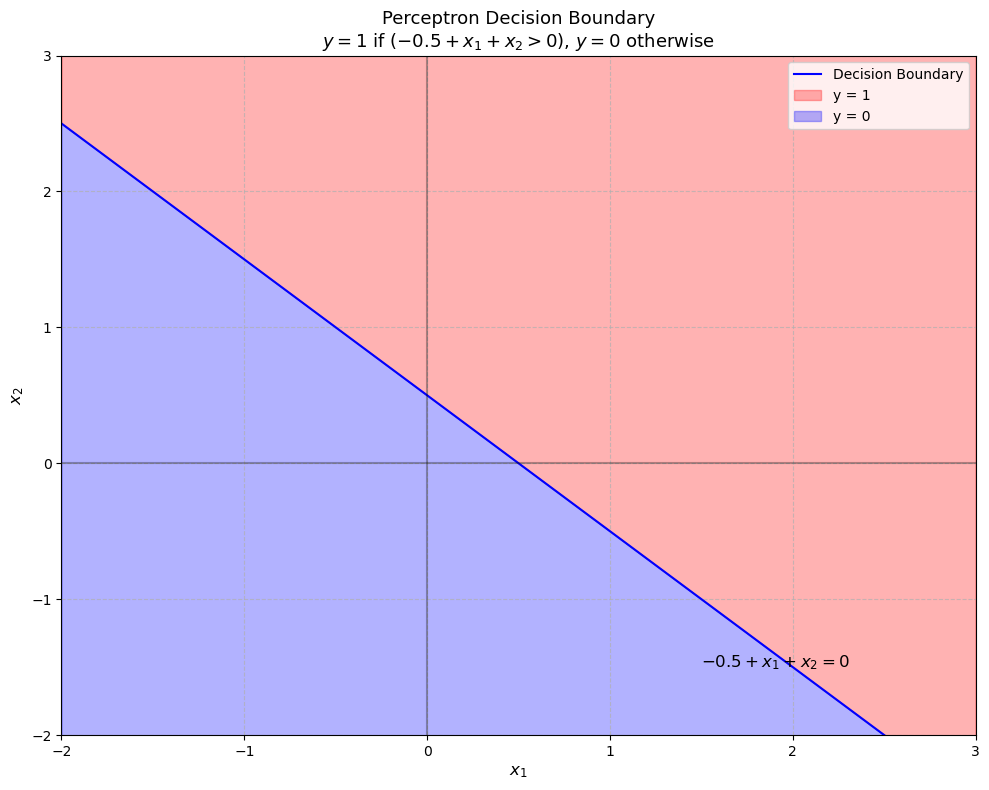

In [2]:
#OR게이트 그래프
import matplotlib.pyplot as plt


# Create figure and axis
plt.figure(figsize=(10, 8))

# Generate points for the decision boundary
x = np.linspace(-2, 3, 100)
y = 0.5 - x  # From -0.5 + x1 + x2 = 0 -> x2 = 0.5 - x1

# Plot decision boundary
plt.plot(x, y, 'b-', label='Decision Boundary')

# Fill regions with different colors
plt.fill_between(x, y, 3, alpha=0.3, color='red', label='y = 1')
plt.fill_between(x, -3, y, alpha=0.3, color='blue', label='y = 0')

# Set plot parameters
plt.xlim(-2, 3)
plt.ylim(-2, 3)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Labels and title
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.title('Perceptron Decision Boundary\n$y = 1$ if $(-0.5 + x_1 + x_2 > 0)$, $y = 0$ otherwise', fontsize=13)
plt.legend(loc='upper right')

# Add decision boundary equation
plt.text(1.5, -1.5, '$-0.5 + x_1 + x_2 = 0$', fontsize=12)

plt.tight_layout()
plt.show()

위와 같이, 퍼셉트론은 애초에 그래프적으로 직선으로 나뉜 두 영역을 만든다.  
(x1,x2)가 (0,0)일 때는 0을 출력.  
(0,1),(1,0),(1,1)일 때는 1을 출력.  
  
이렇듯, 직선으로 나눈 두 영역에서 제대로 분류가 되어 있어야 퍼셉트론이 올바르게 작동한다고 할 수 있다.

문제는 여기에서 나온다. XOR게이트의 경우, 직선만으로는 해당 로직에  
오류가 생길 수 밖에 없다.  
(x1,x2)가 (0,1),(1,0)일 때는 1을 출력.
(0,0),(1,1)일 때는 0을 출력.  
  
즉, 선형 로직의 한계다. =>단층 퍼셉트론으로는 비선형 영역을 분리 불가

### -비선형 로직의 필요성
선형 영역으로만 해결은 불가하기에 곡선(2차식)을 활용할 필요가 생긴다.  
이를, 비선형 영역이라고 한다.

# 5.다층 퍼셉트론

층을 쌓으면 다층 퍼셉트론을 만들 수 있다.  
이를 통해 비선형 영역을 구현가능하다.

### -기존 게이트 조합
방법은 다양하다. 그 중 하나는 AND, NAND, OR를 조합하는 것이다.  
1)x1,x2(두 입력신호)를 각각 NAND, OR에 넣고 두 게이트의 출력값을 입력을 둔다.  
2)이 1)의 출력을 AND의 입력값으로 사용해 출력한다 = XOR게이트 출력  
  
x1=0101  
x2=0011  
s1=1110(NAND출력)  
s2=0111(OR출력)  

---AND---  
y=0110

원리는 생각보다 간단하다.  
- 입력이 (0,0)의 경우: AND가 0을 출력  
- 입력이 (0,1),(1,0)의 경우: AND가 1을 출력  
- 입력이 (1,1)의 경우: AND가 0을 출력  
  
위 결과를 만들기 위해 입력으로 세팅한 게이트는 각각 다음과 같으므로  
NAND=11제외 모두 1  
OR=하나라도 1인 경우면 모두 1  
  
처음 입력값이 서로 다른 경우에만 1을 출력하게 만든다.  
AND게이트 층이 이를 받아 XOR게이트의 연산처럼 만드는 것

### -XOR게이트 구현

In [4]:
def XOR(x1, x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

In [9]:
print(XOR(0,0))
print(XOR(0,1))
print(XOR(1,0))
print(XOR(1,1))

0
1
1
0


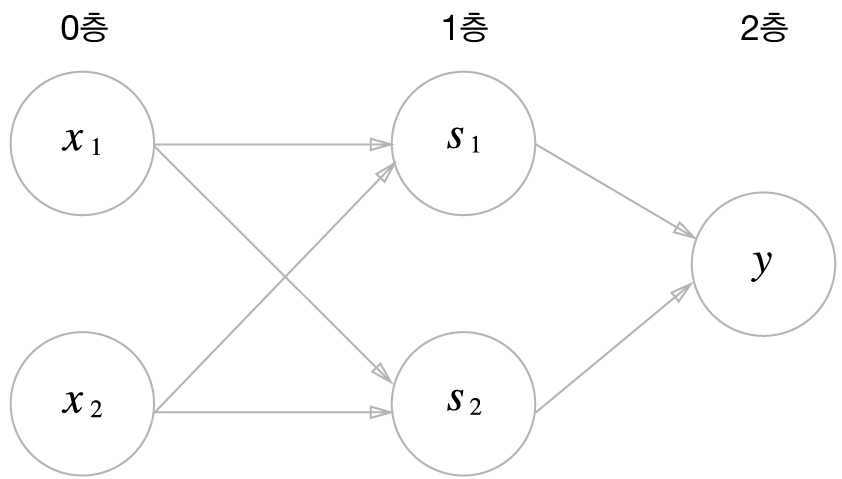  
  
그림처럼 다층 구조의 네트워크를 가진다. =>다층 퍼셉트론  
(가중치를 갖는 층은 사실 0 ~ 1층 사이, 1 ~ 2층 사이 이렇게 2개이므로 2층)

보다시피 마치 부품을 조립하는 것과 같다.  
1층에서 부품을 조립해서 2층에 전달하면 해당 층의 함수가 완성품으로 만들어 최종 출력한다.  
이렇게 단층으로는 표현하지 못한 것을 층을 깊게 해서 더 다양한 것을 구현 가능하다!

# 6.NAND에서 컴퓨터까지

컴퓨턴 입력한 것을 정해진 방법으로 처리하고, 그 결과를 출력한다.  
그렇기에 이론상 NAND게이트의 조합만으로 컴퓨터까지도 만들 수 있다!(물론 비효율적이고, 실제로는 저수준 소자로 구현하는 게 옳다.)  
- 기억할 것은 퍼셉트론을 통해 층을 쌓아 비선형적 표현이 가능하다는 것.  
- 이를 통해 복잡한 정보처리(이론상으론 컴퓨터가 수행하는 처리까지)를 모두 표현할 수 있다는 것.

또한 최종적으로 정리하자면,  
- 퍼셉트론은 입출력을 갖춘 알고리즘. 입력을 정해진 규칙에 따라 출력.  
- 또한, 가중치, 편향을 매개변수로 설정  =>이를 통해 AND,NAND,OR를 구현가능
- 층을 깊게 하여 선형 영역에서 비선형 영역(XOR)의 구현이 가능  